In [ ]:
# IMPORT REQUIRED LIBRARIES

import numpy as np                  # Numerical computations
import pandas as pd                 # Data manipulation
import matplotlib.pyplot as plt     # Basic visualization
import seaborn as sns               # Statistical visualization
import plotly.express as px         # Interactive plots

import warnings
warnings.filterwarnings("ignore")   # Suppress warnings




In [ ]:
# LOAD DATASET
df = pd.read_table("/content/sample.csv",sep=",")
df

,Order_ID,Order_Date,Customer_ID,Customer_Name,City,Product,Category,Quantity,Discount,Sales_Amount,Payment_Method,Delivery_Status,Unit_Price
0,1001.0,2025-04-30,807.0,Eric Cruz,Lawrenceport,Smartwatch,Accessories,3.0,0.05,151543.05,Cash,NaN,53173.0
1,1002.0,2025-09-11,517.0,Amanda Medina,Port Jakeshire,Headphones,Accessories,3.0,0.05,104384.10,Cash,Pending,36626.0
2,1003.0,2025-11-07,125.0,Curtis Guerra,NaN,Laptop,NaN,2.0,NaN,107356.00,Debit Card,Pending,53678.0
3,1004.0,2025-10-16,866.0,NaN,West Kenneth,Tablet,Electronics,4.0,NaN,41267.20,Credit Card,Delivered,12896.0
4,1005.0,NaN,995.0,NaN,Davistown,Headphones,Electronics,NaN,0.15,6177.80,Cash,Delivered,3634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,2025-06-06,261.0,Kathy Morris,New Steven,Headphones,Gadgets,1.0,0.20,59760.00,Cash,Returned,74700.0
496,1497.0,2025-06-15,252.0,NaN,East Gary,Headphones,Gadgets,2.0,0.10,128725.20,NaN,Returned,71514.0
497,1498.0,2025-09-22,716.0,Brenda Sosa,NaN,Tablet,Electronics,4.0,NaN,6660.00,NaN,Pending,1665.0
498,NaN,2025-03-27,NaN,Ricky Morrison,North Alicia,NaN,Electronics,2.0,0.10,NaN,Wallet,NaN,47131.0


In [ ]:
#Returns the number of missing values per column.
# df.isnull().sum()

#Sums all missing values across all columns → total missing values in the entire DataFrame.
# df.isnull().sum().sum()

# (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
 #the percentage of missing values in the entire dataset:

#he percentage of missing values per column
(df.isnull().sum()/df.shape[0])*100


,0
Order_ID,0.0
Order_Date,0.0
Customer_ID,0.0
Customer_Name,0.0
City,0.0
Product,0.0
Category,0.0
Quantity,0.0
Discount,0.0
Sales_Amount,0.0


HANDLE CATEGORICAL MISSING VALUES

In [ ]:
# Select categorical (object) columns
df.select_dtypes(include="object").isnull().sum()

,0
Customer_Name,75
City,75
Product,75
Category,75
Payment_Method,75
Delivery_Status,75


In [ ]:
df['City'].fillna(df['City'].mode()[0],inplace=True)

In [ ]:
# Fill missing categorical values with MODE (most frequent value)
for i in df.select_dtypes(include="object").columns:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
# HANDLE DATE COLUMN

# Convert to datetime; invalid dates become NaT
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
# Replace missing dates with a fixed reference date
df['Order_Date'].fillna(pd.Timestamp('2025-01-01'), inplace=True)

In [ ]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'Customer_Name', 'City',
       'Product', 'Category', 'Quantity', 'Discount', 'Sales_Amount',
       'Payment_Method', 'Delivery_Status', 'Unit_Price'],
      dtype='object')

HANDLE NUMERICAL MISSING VALUES

In [ ]:
# Select numerical columns
colname=df.select_dtypes(["int64","float64"]).columns
# int_cols = df.select_dtypes(include=['int64'])


In [ ]:
colname


Index(['Order_ID', 'Customer_ID', 'Quantity', 'Discount', 'Sales_Amount',
       'Unit_Price'],
      dtype='object')


Fill missing numerical values using MEAN

In [ ]:
a=df['Quantity'].mean()
df['Quantity'].fillna(a,inplace=True)

In [ ]:
b=df['Discount'].mean()
df['Discount'].fillna(b,inplace=True)

In [ ]:
c=df['Sales_Amount'].mean()
df['Sales_Amount'].fillna(c,inplace=True)

In [ ]:
d=df['Unit_Price'].mean()
df['Unit_Price'].fillna(d,inplace=True)

In [ ]:
df

,Order_ID,Order_Date,Customer_ID,Customer_Name,City,Product,Category,Quantity,Discount,Sales_Amount,Payment_Method,Delivery_Status,Unit_Price
0,1001.0,2025-04-30,807.0,Eric Cruz,Lawrenceport,Smartwatch,Accessories,3.000000,0.050000,151543.050000,Cash,NaN,53173.0
1,1002.0,2025-09-11,517.0,Amanda Medina,Port Jakeshire,Headphones,Accessories,3.000000,0.050000,104384.100000,Cash,Pending,36626.0
2,1003.0,2025-11-07,125.0,Curtis Guerra,NaN,Laptop,NaN,2.000000,0.123571,107356.000000,Debit Card,Pending,53678.0
3,1004.0,2025-10-16,866.0,NaN,West Kenneth,Tablet,Electronics,4.000000,0.123571,41267.200000,Credit Card,Delivered,12896.0
4,1005.0,NaN,995.0,NaN,Davistown,Headphones,Electronics,3.002353,0.150000,6177.800000,Cash,Delivered,3634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,2025-06-06,261.0,Kathy Morris,New Steven,Headphones,Gadgets,1.000000,0.200000,59760.000000,Cash,Returned,74700.0
496,1497.0,2025-06-15,252.0,NaN,East Gary,Headphones,Gadgets,2.000000,0.100000,128725.200000,NaN,Returned,71514.0
497,1498.0,2025-09-22,716.0,Brenda Sosa,NaN,Tablet,Electronics,4.000000,0.123571,6660.000000,NaN,Pending,1665.0
498,NaN,2025-03-27,NaN,Ricky Morrison,North Alicia,NaN,Electronics,2.000000,0.100000,111125.020118,Wallet,NaN,47131.0


In [ ]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_ID', 'Customer_Name', 'City',
       'Product', 'Category', 'Quantity', 'Discount', 'Sales_Amount',
       'Payment_Method', 'Delivery_Status', 'Unit_Price'],
      dtype='object')

In [ ]:
cols= ['Order_ID', 'Customer_ID', 'Customer_Name', 'City',
        'Product', 'Category']

df[cols] = df[cols].fillna("unknown")


In [ ]:
df

,Order_ID,Order_Date,Customer_ID,Customer_Name,City,Product,Category,Quantity,Discount,Sales_Amount,Payment_Method,Delivery_Status,Unit_Price
0,1001.0,2025-04-30,807.0,Eric Cruz,Lawrenceport,Smartwatch,Accessories,3.000000,0.050000,151543.050000,Cash,NaN,53173.0
1,1002.0,2025-09-11,517.0,Amanda Medina,Port Jakeshire,Headphones,Accessories,3.000000,0.050000,104384.100000,Cash,Pending,36626.0
2,1003.0,2025-11-07,125.0,Curtis Guerra,unknown,Laptop,unknown,2.000000,0.123571,107356.000000,Debit Card,Pending,53678.0
3,1004.0,2025-10-16,866.0,unknown,West Kenneth,Tablet,Electronics,4.000000,0.123571,41267.200000,Credit Card,Delivered,12896.0
4,1005.0,unknown,995.0,unknown,Davistown,Headphones,Electronics,3.002353,0.150000,6177.800000,Cash,Delivered,3634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,unknown,2025-06-06,261.0,Kathy Morris,New Steven,Headphones,Gadgets,1.000000,0.200000,59760.000000,Cash,Returned,74700.0
496,1497.0,2025-06-15,252.0,unknown,East Gary,Headphones,Gadgets,2.000000,0.100000,128725.200000,NaN,Returned,71514.0
497,1498.0,2025-09-22,716.0,Brenda Sosa,unknown,Tablet,Electronics,4.000000,0.123571,6660.000000,NaN,Pending,1665.0
498,unknown,2025-03-27,unknown,Ricky Morrison,North Alicia,unknown,Electronics,2.000000,0.100000,111125.020118,Wallet,NaN,47131.0


In [ ]:
df.isna().sum()

,0
Order_ID,0
Order_Date,0
Customer_ID,0
Customer_Name,0
City,0
Product,0
Category,0
Quantity,0
Discount,0
Sales_Amount,0


BIVARIATE ANALYSIS

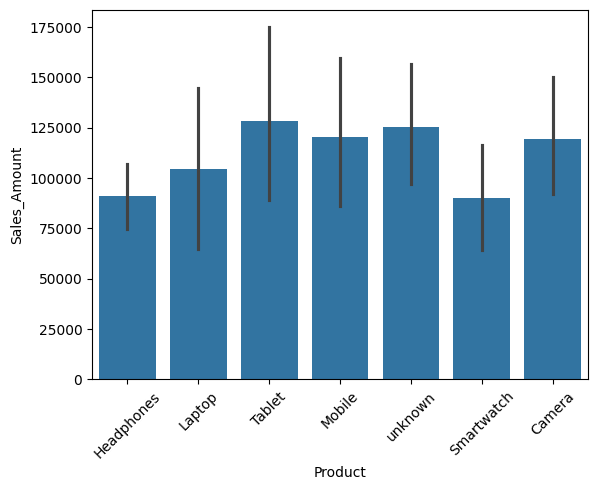

In [ ]:
# Sales by Product for Gadgets category
x="Product"
y="Sales_Amount"
pg = df[df['Category'] == 'Gadgets']
sns.barplot(data=pg, x=x, y=y)
plt.xticks(rotation=45)  # rotate x labels if too long
plt.show()


FEATURE ENGINEERING – YEAR EXTRACTION

In [ ]:
import plotly.express as px
# Extract year from Order_Date
df['Year'] = pd.to_datetime(df['Order_Date']).dt.year
# Aggregate sales by year
df_yearly = df.groupby('Year', as_index=False)['Sales_Amount'].sum()

px.bar(df_yearly, x='Year', y='Sales_Amount', text='Sales_Amount', hover_data=['Sales_Amount'],width=700, height=400  )


CORRELATION ANALYSIS
* Correlation only works on numeric data

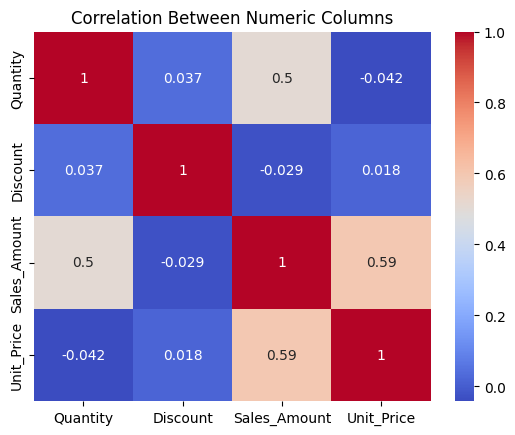

In [ ]:
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Columns")
plt.show()


TIME SERIES ANALYSIS

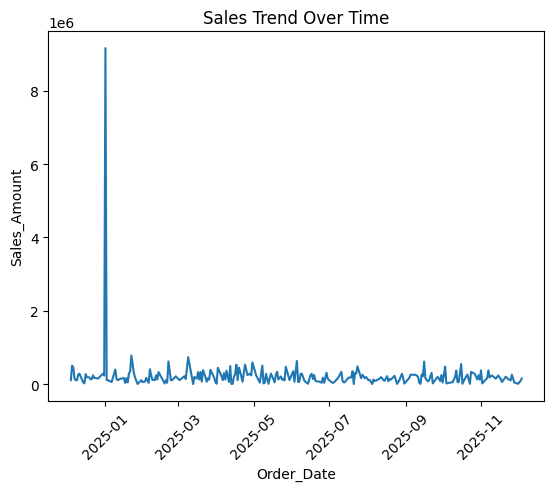

In [ ]:
# Sales trend over time
sales_over_time = df.groupby('Order_Date')['Sales_Amount'].sum().reset_index()

sns.lineplot(data=sales_over_time, x='Order_Date', y='Sales_Amount')
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()


DISTRIBUTION ANALYSIS & KURTOSIS

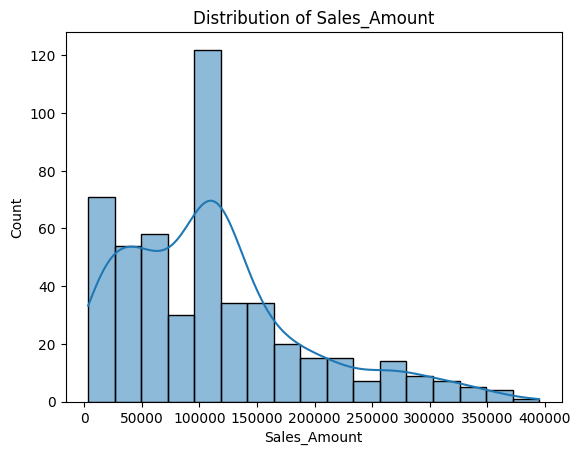

In [ ]:
# Example for Sales_Amount
sns.histplot(df['Sales_Amount'], kde=True)  # kde=True adds smooth curve
plt.title("Distribution of Sales_Amount")
plt.show()

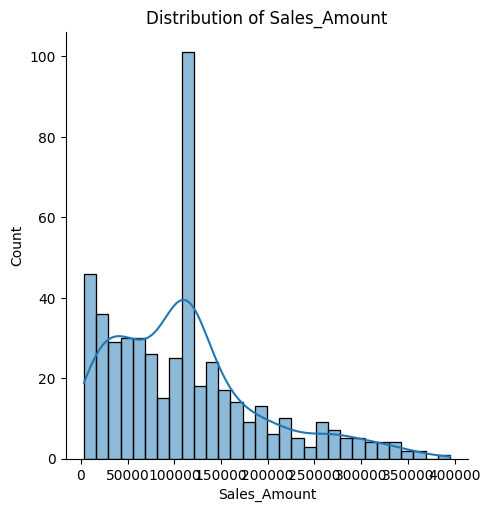

In [ ]:
# Distribution of Sales_Amount
sns.displot(df['Sales_Amount'], kde=True, bins=30)
plt.title("Distribution of Sales_Amount")
plt.show()


In [ ]:
# Kurtosis measures tail heaviness of distribution
kurt = df['Sales_Amount'].kurtosis()
print("Kurtosis of Sales_Amount:", kurtosis_value)

DISTRIBUTION OF ALL NUMERICAL FEATURES

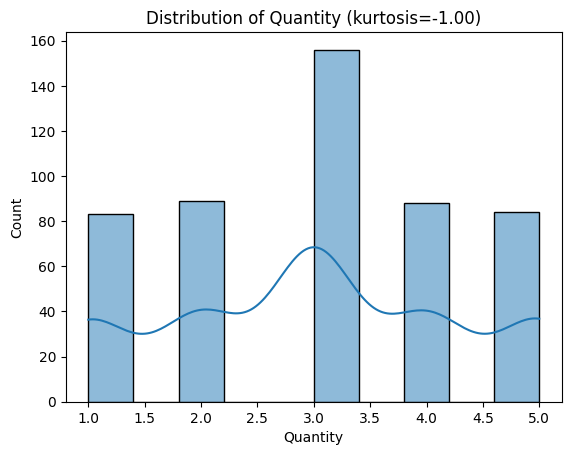

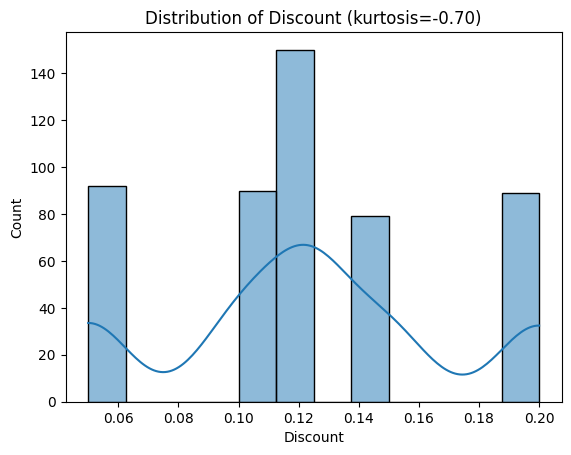

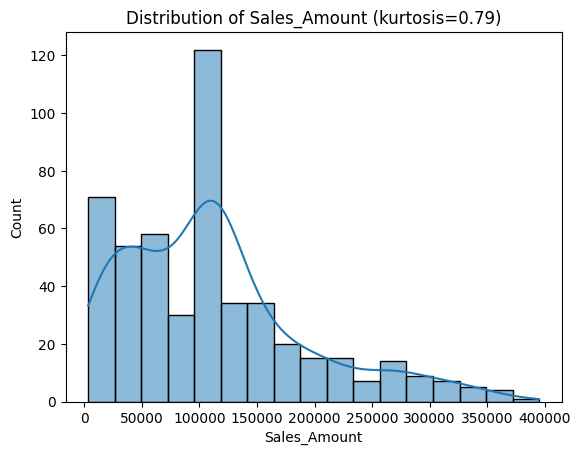

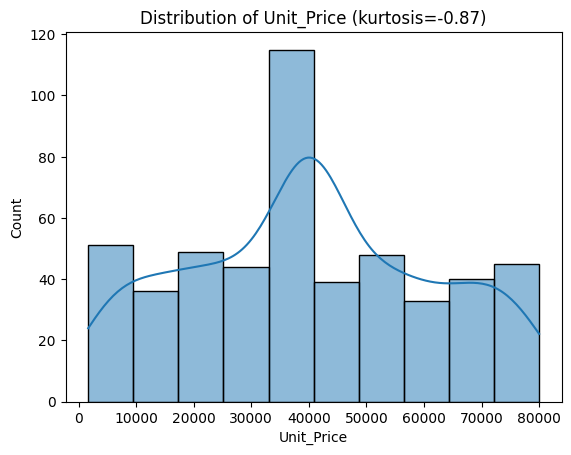

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} (kurtosis={df[col].kurtosis():.2f})")
    plt.show()
